# Tarea 1 de Astronomía Galáctica.

In [1]:
pip install photutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Se importan las siguientes librerías y funciones
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import detect_sources,detect_threshold,deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry,Ellipse
from photutils.aperture import EllipticalAperture

## Catálogo

In [3]:
# Se abren los archivos .fit y se leen cada uno de ellos

Imagen_1 = fits.open('cutout_122.5903_33.9570.fits')
Imagen_2 = fits.open('Imagen_126.8037_36.3519.fits')
Imagen_3 = fits.open('Imagen_3_351.6808_15.7246.fits')
Imagen_1.info()
Imagen_2.info()
Imagen_3.info()


Filename: cutout_122.5903_33.9570.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   
Filename: Imagen_126.8037_36.3519.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   
Filename: Imagen_3_351.6808_15.7246.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   


In [5]:
image_data = Imagen_1[0].data
image_data_2 = Imagen_2[0].data
image_data_3 = Imagen_3[0].data
print(type(image_data))
print(image_data.shape)
print(type(image_data_2))
print(image_data_2.shape)
print(type(image_data_3))
print(image_data_3.shape)

<class 'numpy.ndarray'>
(3, 1024, 1024)
<class 'numpy.ndarray'>
(3, 1024, 1024)
<class 'numpy.ndarray'>
(3, 1024, 1024)


In [6]:
Imagen_Uno = np.array(Imagen_1[0].data)
Imagen_Dos = np.array(image_data_2)
Imagen_Tres = np.array(image_data_3)
Master_imagen_uno = np.mean(Imagen_Uno,axis=0)
Imagen_Filtro_g = Imagen_Uno[0,:,:]
Imagen_Filtro_r = Imagen_Uno[1,:,:]
Imagen_Filtro_z = Imagen_Uno[2,:,:]
Im_2_g = Imagen_Dos[0,:,:]
Im_2_r = Imagen_Dos[1,:,:]
Im_2_z = Imagen_Dos[2,:,:]
Im_3_g = Imagen_Tres[0,:,:]
Im_3_r = Imagen_Tres[1,:,:]
Im_3_z = Imagen_Tres[2,:,:]


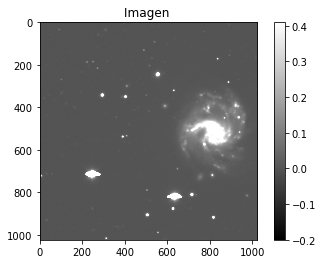

In [7]:
plt.imshow(Master_imagen_uno, cmap='gray', vmax=np.mean(Master_imagen_uno)+np.std(Master_imagen_uno), vmin=-0.2)
plt.colorbar()
plt.title('Imagen ')
plt.show()

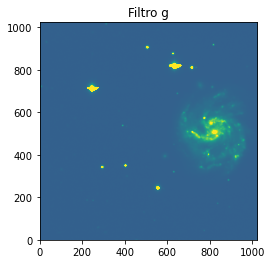

In [9]:
plt.imshow(Imagen_Filtro_g, origin='lower',vmax=0.45, vmin=-0.2)
plt.title('Filtro g')
plt.show()

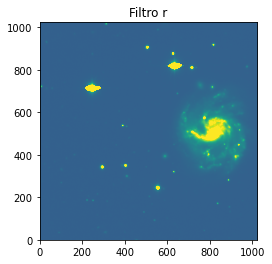

In [10]:
plt.imshow(Imagen_Filtro_r, origin='lower',vmax=0.45, vmin=-0.2)
plt.title('Filtro r')
plt.show()

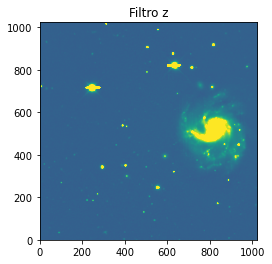

In [11]:
plt.imshow(Imagen_Filtro_z, origin='lower',vmax=0.45, vmin=-0.2)
plt.title('Filtro z')
plt.show()

In [12]:
Fuentes_g = detect_threshold(Imagen_Filtro_g,3)
Fuentes_r = detect_threshold(Imagen_Filtro_r,3)
Fuentes_z = detect_threshold(Imagen_Filtro_z,3)
Segmento_g = detect_sources(Imagen_Filtro_g,Fuentes_g , npixels=10)
Segmento_r = detect_sources(Imagen_Filtro_r,Fuentes_r , npixels=10)
Segmento_z = detect_sources(Imagen_Filtro_z,Fuentes_z , npixels=10)
print(Segmento_g)
print(Segmento_r)
print(Segmento_z)

<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 126
labels: [  1   2   3   4   5 ... 122 123 124 125 126]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 152
labels: [  1   2   3   4   5 ... 148 149 150 151 152]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 141
labels: [  1   2   3   4   5 ... 137 138 139 140 141]


Text(0.5, 1.0, 'Imagen z')

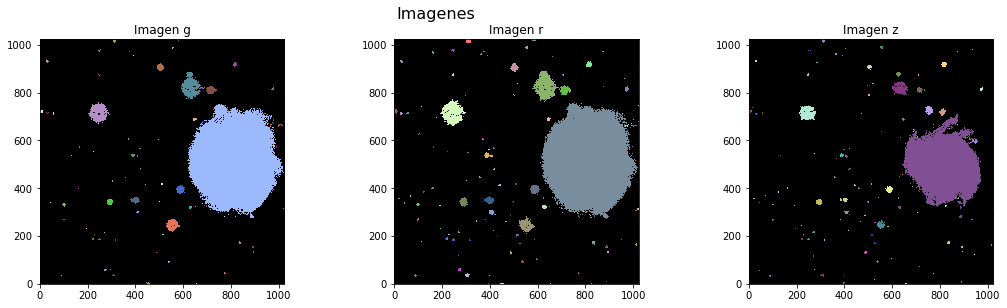

In [13]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes',x=0.45,fontsize=16)
ax[0].imshow(Segmento_g,origin='lower', cmap=Segmento_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen g')
ax[1].imshow(Segmento_r, origin='lower', cmap=Segmento_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen r')
ax[2].imshow(Segmento_z, origin='lower', cmap=Segmento_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen z')


In [14]:
Segmentos_Separados_g = deblend_sources(Imagen_Filtro_g,Segmento_g,npixels=7, nlevels=32, contrast=0.45,
                               progress_bar=False)
Segmentos_Separados_r = deblend_sources(Imagen_Filtro_r,Segmento_r,npixels=7, nlevels=32, contrast=0.43,
                               progress_bar=False)
Segmentos_Separados_z = deblend_sources(Imagen_Filtro_z,Segmento_z,npixels=7, nlevels=32, contrast=0.33,
                               progress_bar=False)

Text(0.5, 1.0, 'Imagen z')

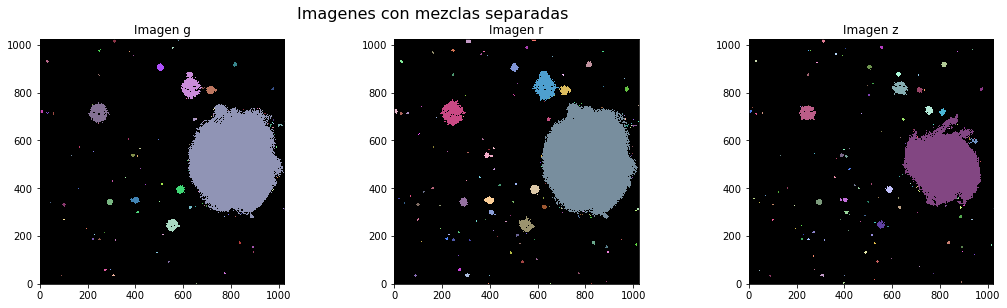

In [15]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes con mezclas separadas ',x=0.45,fontsize=16)
ax[0].imshow(Segmentos_Separados_g,origin='lower', cmap=Segmento_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen g')
ax[1].imshow(Segmentos_Separados_r, origin='lower', cmap=Segmento_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen r')
ax[2].imshow(Segmentos_Separados_z, origin='lower', cmap=Segmento_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen z')


In [16]:
# Generamos un catálogo para el filtro g:
Catálogo_Fuentes_g = SourceCatalog(Imagen_Filtro_g,Segmentos_Separados_g)
tabla_de_fuentes_g = Catálogo_Fuentes_g.to_table()
tabla_de_fuentes_g['xcentroid'].info.format = '.2f'  # optional format
tabla_de_fuentes_g['ycentroid'].info.format = '.2f'
tabla_de_fuentes_g['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_g)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    452.49      1.42 ...             nan      1.73          nan
    2    654.25      0.81 ...             nan      0.32          nan
    3    306.58     36.13 ...             nan      2.06          nan
    4     89.53     34.95 ...             nan      0.78          nan
    5    770.94     44.64 ...             nan      2.15          nan
    6    272.84     58.92 ...             nan      2.33          nan
    7    292.84     61.46 ...             nan      0.39          nan
    8    537.32     92.70 ...             nan      2.29          nan
    9    487.68    131.22 ...             nan      1.30          nan
   10    892.41    133.72 ...             nan      0.75          nan
  ...       ...       ... ...             ...       ...          ...
  119    391.22    955.91 ...     

In [17]:
#Generamos una tabla de catalogo para la imagen del filtro r.
Catálogo_Fuentes_r = SourceCatalog(Imagen_Filtro_r,Segmentos_Separados_r)
tabla_de_fuentes_r = Catálogo_Fuentes_r.to_table()
tabla_de_fuentes_r['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_r['ycentroid'].info.format = '.2f'
tabla_de_fuentes_r['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_r)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    452.38      1.39 ...             nan      2.88          nan
    2    654.45      1.10 ...             nan      0.66          nan
    3    394.64      4.13 ...             nan      1.16          nan
    4    822.87      3.53 ...             nan      0.74          nan
    5    886.97      9.34 ...             nan      0.94          nan
    6    306.92     36.15 ...             nan      6.50          nan
    7     89.38     34.87 ...             nan      2.73          nan
    8    397.58     36.81 ...             nan      1.15          nan
    9    771.28     44.53 ...             nan      2.14          nan
   10    273.17     58.94 ...             nan      3.96          nan
  ...       ...       ... ...             ...       ...          ...
  144    872.47    969.37 ...     

In [18]:
#Lo mismo para el filtro z

Catálogo_Fuentes_z = SourceCatalog(Imagen_Filtro_z,Segmentos_Separados_z)
tabla_de_fuentes_z = Catálogo_Fuentes_z.to_table()
tabla_de_fuentes_z['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_z['ycentroid'].info.format = '.2f'
tabla_de_fuentes_z['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_z)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    654.11      1.36 ...             nan      2.11          nan
    2    394.94      4.27 ...             nan      5.40          nan
    3    887.11      9.15 ...             nan      5.34          nan
    4    524.65     17.50 ...             nan      2.99          nan
    5    306.67     35.75 ...             nan     14.49          nan
    6     88.87     34.84 ...             nan     10.51          nan
    7    397.84     36.77 ...             nan      2.96          nan
    8    771.23     44.56 ...             nan      1.98          nan
    9     45.06     57.07 ...             nan      1.81          nan
   10    273.43     59.43 ...             nan      3.44          nan
  ...       ...       ... ...             ...       ...          ...
  134    247.46    975.37 ...     

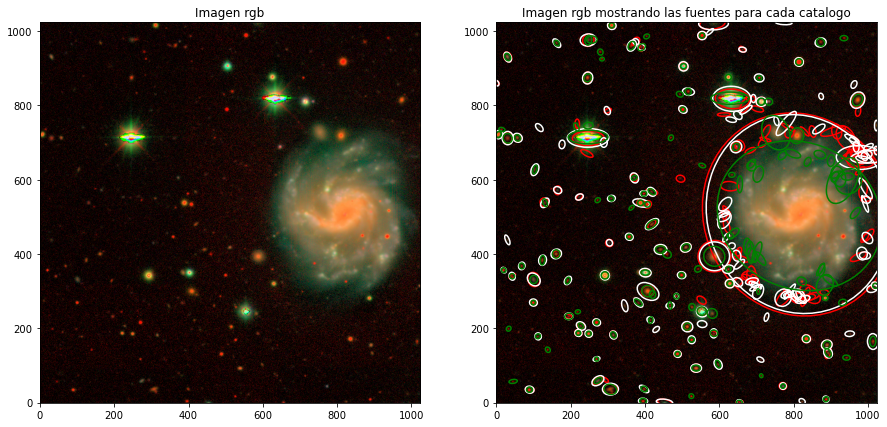

In [19]:
Imagen_rgb = make_lupton_rgb(Imagen_Filtro_z,
                           Imagen_Filtro_r,Imagen_Filtro_g,minimum=0, stretch=0.066, Q=8)
fig,ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(Imagen_rgb,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb)+np.std(Imagen_rgb))
ax[0].set_title('Imagen rgb')
ax[1].imshow(Imagen_rgb,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb)+np.std(Imagen_rgb))
ax[1].set_title('Imagen rgb mostrando las fuentes para cada catalogo')
Catálogo_Fuentes_g.plot_kron_apertures(color='red', lw=1.5)
Catálogo_Fuentes_r.plot_kron_apertures(color='white', lw=1.5)
Catálogo_Fuentes_z.plot_kron_apertures(color= 'green', lw=1.5)
plt.show()

Text(0.5, 1.0, 'Imagen z')

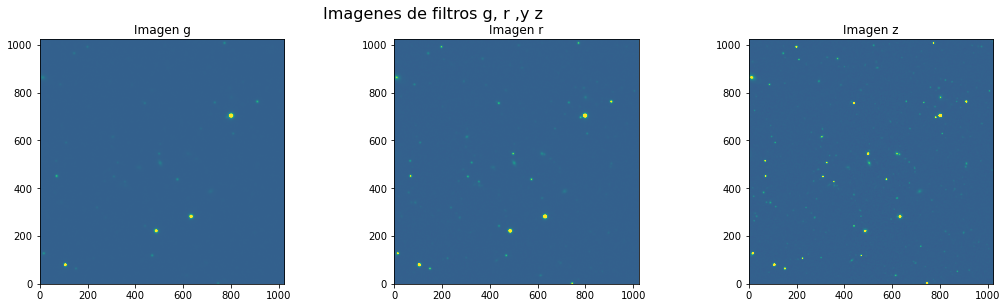

In [21]:
#Segunda imagen

fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes de filtros g, r ,y z ',x=0.45,fontsize=16)
ax[0].imshow(Im_2_g, origin='lower',vmax=0.45, vmin=-0.2)
ax[0].set_title('Imagen g')
ax[1].imshow(Im_2_r, origin='lower',vmax=0.45, vmin=-0.2)
ax[1].set_title('Imagen r')
ax[2].imshow(Im_2_z, origin='lower',vmax=0.45, vmin=-0.2)
ax[2].set_title('Imagen z')

In [22]:
# Hacemos el mismo procedimiento para la imagen 2,
# es decir, detectar las fuentes y segmentarlas.

Fuentes_2_g = detect_threshold(Im_2_g,3)
Fuentes_2_r = detect_threshold(Im_2_r,3)
Fuentes_2_z = detect_threshold(Im_2_z,3)
Segmento_2_g = detect_sources(Im_2_g,Fuentes_2_g , npixels=10)
Segmento_2_r = detect_sources(Im_2_r,Fuentes_2_r , npixels=10)
Segmento_2_z = detect_sources(Im_2_z,Fuentes_2_z , npixels=10)
print(Segmento_2_g)
print(Segmento_2_r)
print(Segmento_2_z)

<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 85
labels: [ 1  2  3  4  5 ... 81 82 83 84 85]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 135
labels: [  1   2   3   4   5 ... 131 132 133 134 135]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 193
labels: [  1   2   3   4   5 ... 189 190 191 192 193]


Text(0.5, 1.0, 'Imagen 2 z')

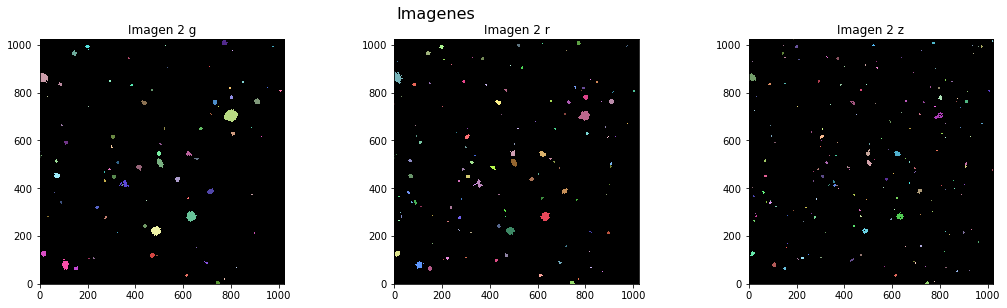

In [23]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes',x=0.45,fontsize=16)
ax[0].imshow(Segmento_2_g,origin='lower', cmap=Segmento_2_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen 2 g')
ax[1].imshow(Segmento_2_r, origin='lower', cmap=Segmento_2_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen 2 r')
ax[2].imshow(Segmento_2_z, origin='lower', cmap=Segmento_2_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen 2 z')


In [24]:
Segmentos2_Separados_g = deblend_sources(Im_2_g,Segmento_2_g,npixels=7, nlevels=32, contrast=0.45,
                               progress_bar=False)
Segmentos2_Separados_r = deblend_sources(Im_2_r,Segmento_2_r,npixels=7, nlevels=32, contrast=0.43,
                               progress_bar=False)
Segmentos2_Separados_z = deblend_sources(Im_2_z,Segmento_2_z,npixels=7, nlevels=32, contrast=0.33,
                               progress_bar=False)

Text(0.5, 1.0, 'Imagen 2 z')

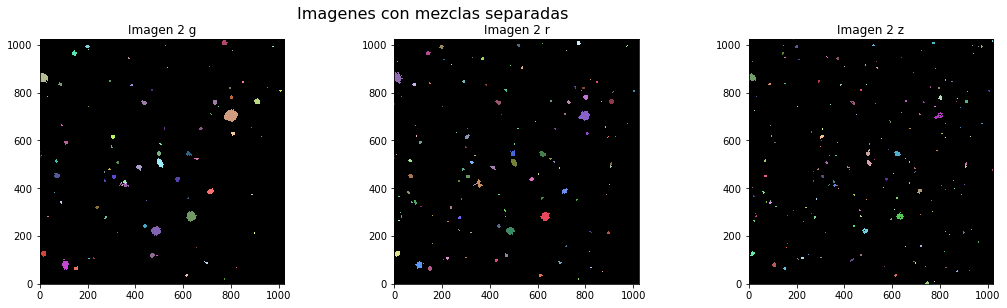

In [25]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes con mezclas separadas ',x=0.45,fontsize=16)
ax[0].imshow(Segmentos2_Separados_g,origin='lower', cmap=Segmento_2_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen 2 g')
ax[1].imshow(Segmentos2_Separados_r, origin='lower', cmap=Segmento_2_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen 2 r')
ax[2].imshow(Segmentos2_Separados_z, origin='lower', cmap=Segmento_2_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen 2 z')

In [30]:
# Catálogo Imagen 2 para el filtro g

Catálogo_Fuentes_g2 = SourceCatalog(Im_2_g,Segmentos2_Separados_g)
tabla_de_fuentes_g2 = Catálogo_Fuentes_g2.to_table()
tabla_de_fuentes_g2['xcentroid'].info.format = '.2f'  # optional format
tabla_de_fuentes_g2['ycentroid'].info.format = '.2f'
tabla_de_fuentes_g2['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_g2)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    744.06      3.60 ...             nan      6.11          nan
    2    770.30     18.33 ...             nan      1.07          nan
    3    612.63     36.05 ...             nan      1.70          nan
    4    150.01     64.44 ...             nan      5.38          nan
    5    105.41     80.05 ...             nan    103.35          nan
    6    822.17     67.64 ...             nan      0.30          nan
    7    694.08     89.05 ...             nan      2.03          nan
    8    429.36     99.49 ...             nan      0.42          nan
    9    205.24    105.02 ...             nan      0.37          nan
   10    223.47    107.23 ...             nan      0.75          nan
  ...       ...       ... ...             ...       ...          ...
   80    522.73    996.40 ...     

In [29]:
# Catálogo Imagen 2 para el filtro g

Catálogo_Fuentes_r2 = SourceCatalog(Im_2_r,Segmentos2_Separados_r)
tabla_de_fuentes_r2 = Catálogo_Fuentes_r2.to_table()
tabla_de_fuentes_r2['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_r2['ycentroid'].info.format = '.2f'
tabla_de_fuentes_r2['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_r2)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    744.11      3.35 ...             nan     26.33          nan
    2    769.94     18.91 ...             nan      1.42          nan
    3    612.55     35.69 ...             nan      6.40          nan
    4    870.31     52.35 ...             nan      1.41          nan
    5    149.95     64.30 ...             nan     21.94          nan
    6    105.37     80.05 ...             nan    191.45          nan
    7    822.08     67.79 ...             nan      1.27          nan
    8    694.04     88.75 ...             nan      4.51          nan
    9    428.50     98.40 ...             nan      4.58          nan
   10    203.32    101.65 ...             nan      0.78          nan
  ...       ...       ... ...             ...       ...          ...
  127    720.58    973.22 ...     

In [31]:
# Catálogo Imagen 2 para el filtro g

Catálogo_Fuentes_z2 = SourceCatalog(Im_2_z,Segmentos2_Separados_z)
tabla_de_fuentes_z2 = Catálogo_Fuentes_z2.to_table()
tabla_de_fuentes_z2['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_z2['ycentroid'].info.format = '.2f'
tabla_de_fuentes_z2['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_z2)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    744.08      2.78 ...             nan    101.15          nan
    2    776.25     11.03 ...             nan      1.04          nan
    3    612.71     35.87 ...             nan     13.48          nan
    4    568.93     44.63 ...             nan      0.95          nan
    5     83.12     48.87 ...             nan      1.38          nan
    6    870.38     52.75 ...             nan      6.81          nan
    7    919.63     57.73 ...             nan      2.84          nan
    8    149.82     64.39 ...             nan     64.43          nan
    9    822.15     67.79 ...             nan      1.54          nan
   10    736.80     71.77 ...             nan      1.22          nan
  ...       ...       ... ...             ...       ...          ...
  184    197.91    991.03 ...     

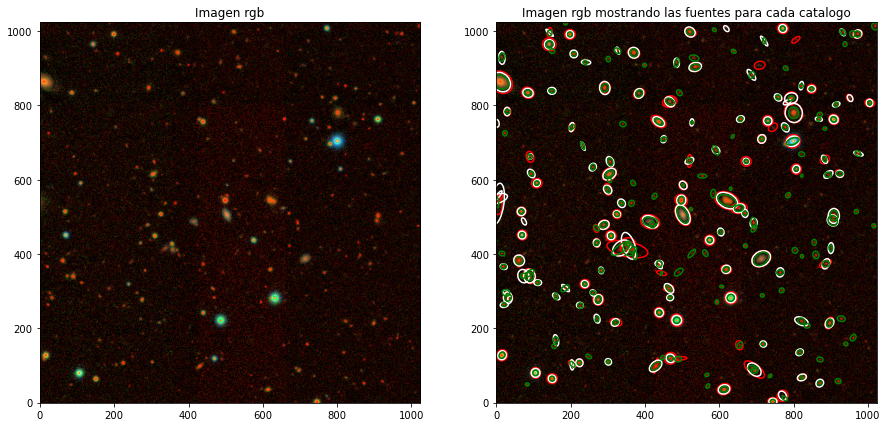

In [32]:
Imagen_rgb_2 =make_lupton_rgb(Im_2_z,
                           Im_2_r,Im_2_g,minimum=0, stretch=0.04, Q=8)

fig,ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(Imagen_rgb_2,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb_2)+np.std(Imagen_rgb_2))
ax[0].set_title('Imagen rgb')
ax[1].imshow(Imagen_rgb_2,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb_2)+np.std(Imagen_rgb_2))
ax[1].set_title('Imagen rgb mostrando las fuentes para cada catalogo')
Catálogo_Fuentes_g2.plot_kron_apertures(color='red', lw=1.5)
Catálogo_Fuentes_r2.plot_kron_apertures(color='white', lw=1.5)
Catálogo_Fuentes_z2.plot_kron_apertures(color= 'green', lw=1.5)
plt.show()

Text(0.5, 1.0, 'Imagen 3 z')

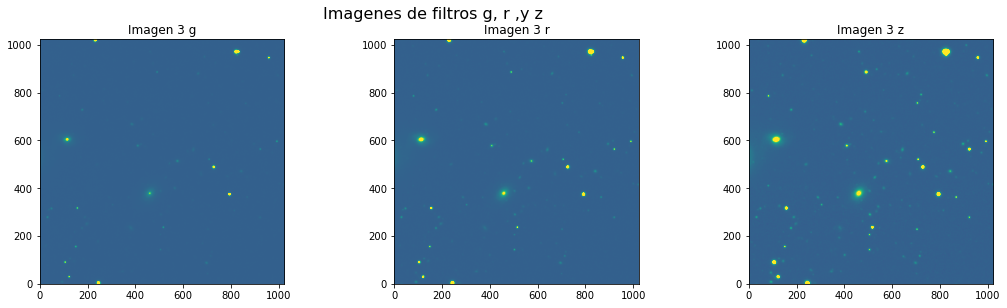

In [33]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes de filtros g, r ,y z ',x=0.45,fontsize=16)
ax[0].imshow(Im_3_g, origin='lower',vmax=0.45, vmin=-0.2)
ax[0].set_title('Imagen 3 g')
ax[1].imshow(Im_3_r, origin='lower',vmax=0.45, vmin=-0.2)
ax[1].set_title('Imagen 3 r')
ax[2].imshow(Im_3_z, origin='lower',vmax=0.45, vmin=-0.2)
ax[2].set_title('Imagen 3 z')

In [34]:
Fuentes_3_g = detect_threshold(Im_3_g,3)
Fuentes_3_r = detect_threshold(Im_3_r,3)
Fuentes_3_z = detect_threshold(Im_3_z,3)
Segmento_3_g = detect_sources(Im_3_g,Fuentes_3_g , npixels=10)
Segmento_3_r = detect_sources(Im_3_r,Fuentes_3_r , npixels=10)
Segmento_3_z = detect_sources(Im_3_z,Fuentes_3_z , npixels=10)
Segmentos3_Separados_g = deblend_sources(Im_3_g,Segmento_3_g,npixels=7, nlevels=32, contrast=0.45,
                               progress_bar=False)
Segmentos3_Separados_r = deblend_sources(Im_3_r,Segmento_3_r,npixels=7, nlevels=32, contrast=0.43,
                               progress_bar=False)
Segmentos3_Separados_z = deblend_sources(Im_3_z,Segmento_3_z,npixels=7, nlevels=32, contrast=0.43,
                               progress_bar=False)
print(Segmento_3_g)
print(Segmento_3_r)
print(Segmento_3_z)

<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 136
labels: [  1   2   3   4   5 ... 132 133 134 135 136]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 150
labels: [  1   2   3   4   5 ... 146 147 148 149 150]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 154
labels: [  1   2   3   4   5 ... 150 151 152 153 154]


Text(0.5, 1.0, 'Imagen 3 z')

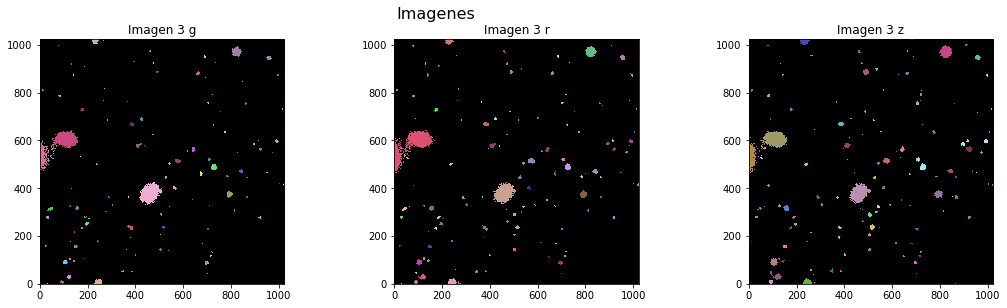

In [35]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes',x=0.45,fontsize=16)
ax[0].imshow(Segmento_3_g,origin='lower', cmap=Segmento_3_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen 3 g')
ax[1].imshow(Segmento_3_r, origin='lower', cmap=Segmento_3_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen 3 r')
ax[2].imshow(Segmento_3_z, origin='lower', cmap=Segmento_3_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen 3 z')

Text(0.5, 1.0, 'Imagen 3 z')

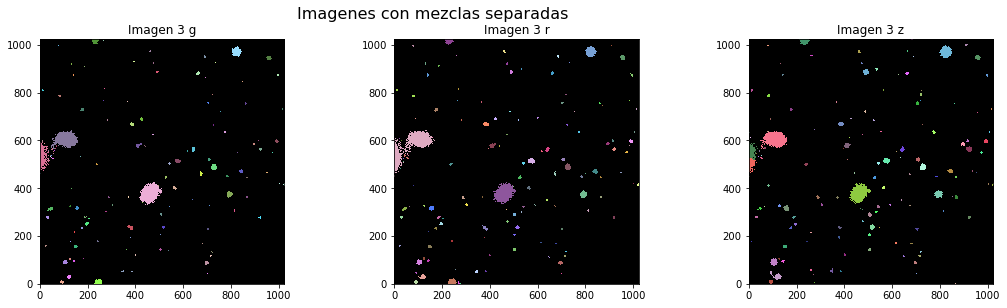

In [36]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes con mezclas separadas ',x=0.45,fontsize=16)
ax[0].imshow(Segmentos3_Separados_g,origin='lower', cmap=Segmento_3_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen 3 g')
ax[1].imshow(Segmentos3_Separados_r, origin='lower', cmap=Segmento_3_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen 3 r')
ax[2].imshow(Segmentos3_Separados_z, origin='lower', cmap=Segmento_3_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen 3 z')

In [42]:
Catálogo_Fuentes_g3 = SourceCatalog(Im_3_g,Segmentos3_Separados_g)
tabla_de_fuentes_g3 = Catálogo_Fuentes_g3.to_table()
tabla_de_fuentes_g3['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_g3['ycentroid'].info.format = '.2f'
tabla_de_fuentes_g3['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_g3)
Catálogo_Fuentes_r3 = SourceCatalog(Im_3_r,Segmentos3_Separados_r)
tabla_de_fuentes_r3 = Catálogo_Fuentes_r3.to_table()
tabla_de_fuentes_r3['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_r3['ycentroid'].info.format = '.2f'
tabla_de_fuentes_r3['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_r3)
Catálogo_Fuentes_z3 = SourceCatalog(Im_3_z,Segmentos3_Separados_z)
tabla_de_fuentes_z3 = Catálogo_Fuentes_z3.to_table()
tabla_de_fuentes_z3['xcentroid'].info.format = '.2f'  
tabla_de_fuentes_z3['ycentroid'].info.format = '.2f'
tabla_de_fuentes_z3['kron_flux'].info.format = '.2f'
print(tabla_de_fuentes_z3)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1     30.37      1.75 ...             nan      0.41          nan
    2    243.89      4.37 ...             nan    410.17          nan
    3     91.71      8.34 ...             nan      4.01          nan
    4    121.37     30.07 ...             nan     23.30          nan
    5    699.96     42.96 ...             nan      0.84          nan
    6    344.19     52.35 ...             nan      1.73          nan
    7    383.60     53.20 ...             nan      0.56          nan
    8    104.65     91.01 ...             nan     23.76          nan
    9    695.63     88.09 ...             nan      6.80          nan
   10    142.14     95.70 ...             nan      1.48          nan
  ...       ...       ... ...             ...       ...          ...
  128    392.47    929.35 ...     

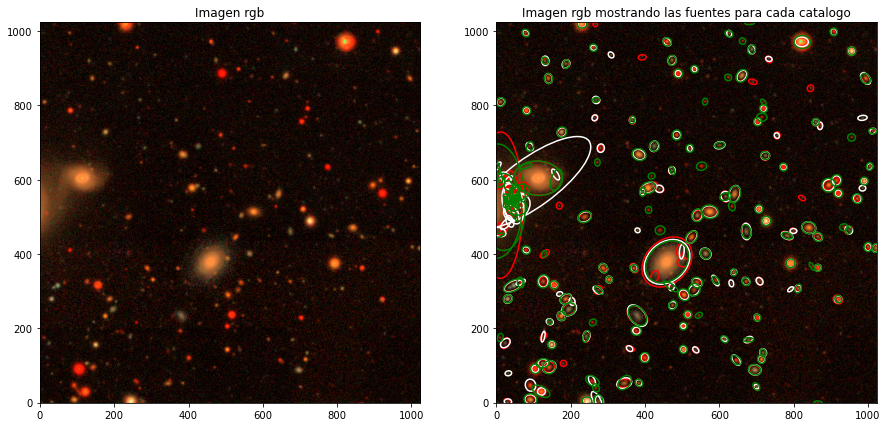

In [43]:
Imagen_rgb_3 =make_lupton_rgb(Im_3_z,
                           Im_3_r,Im_3_g,minimum=0, stretch=0.04, Q=8)

fig,ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(Imagen_rgb_3,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb_3)+np.std(Imagen_rgb_3))
ax[0].set_title('Imagen rgb')
ax[1].imshow(Imagen_rgb_3,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb_3)+np.std(Imagen_rgb_3))
ax[1].set_title('Imagen rgb mostrando las fuentes para cada catalogo')
Catálogo_Fuentes_g3.plot_kron_apertures(color='red', lw=1.5)
Catálogo_Fuentes_r3.plot_kron_apertures(color='white', lw=1.5)
Catálogo_Fuentes_z3.plot_kron_apertures(color= 'green', lw=1.5)
plt.show()

## Isofótas

In [462]:
Objeto1 = Imagen_Filtro_z[300:770,600:1000]

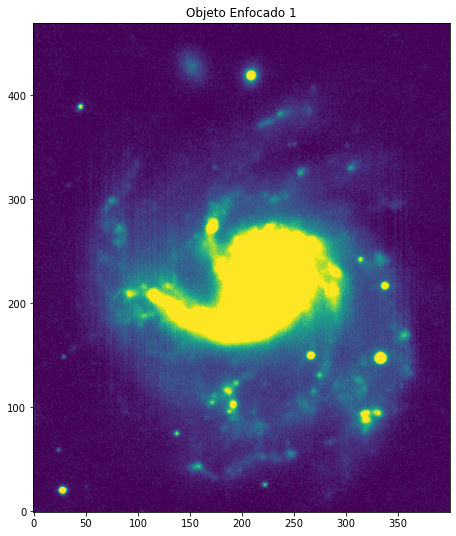

In [463]:
plt.figure(figsize=(9,9))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 1')
plt.show()

(<matplotlib.patches.Ellipse at 0x1629511b820>,)

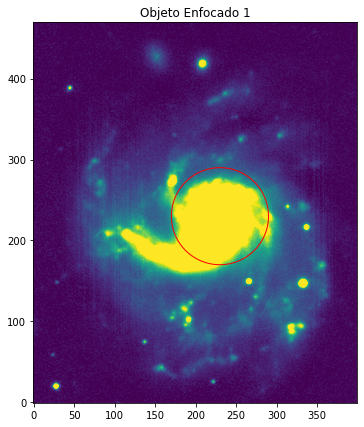

In [473]:
Elipse = EllipseGeometry(x0=230, y0=230, sma=60, eps=0.001,
                           pa=30.0 * np.pi / 180.0)

aper = EllipticalAperture((Elipse.x0, Elipse.y0), Elipse.sma,
                          Elipse.sma * (1 - Elipse.eps),
                          Elipse.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 1')

aper.plot(color="red")

In [474]:
def Isofotas(Objeto,Formas):
    return Ellipse(Objeto,Formas).fit_image()
def Aperturas(g,y):
    return EllipticalAperture((g.x0[y], g.y0[y]), g.sma[y],
                          g.sma[y] * (1 - g.eps[y]),
                          g.pa[y])


In [471]:
Isofota_Imagen_1.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,15.075775121628045,0.0,0.0,0.0,0.0,0.0,0.0,None,None,219.9067137664505,0.0,206.33503393851564,0.0,1,0,0,0
0.5153723524097881,14.989143032341465,0.013635504527182929,0.6055543293932438,0.0785501350247064,89.81423501639506,5.507542217306639,-0.4719027669177134,0.42084805074750015,0.891810941258762,219.9067137664505,0.020892153283865386,206.33503393851564,0.05135863010669248,13,0,10,0
0.5669095876507669,14.964325728147621,0.01509662573482381,0.569897039552805,0.08203350299206608,88.51914263120162,5.95943519519793,-0.4949550363011496,0.4178909681300974,0.8443008707478562,219.8830432100327,0.024033598741027055,206.37409333384258,0.05409426464729194,13,0,10,0
0.6236005464158436,14.92077936711011,0.016978188818009304,0.5032547941181523,0.07086927415864303,87.30573676664466,5.570590528679847,-0.6769802094753847,0.4308796577057991,0.6364730485100925,219.85650594867147,0.0228788227184561,206.4041569527779,0.044479026899913766,13,0,12,0
0.685960601057428,14.79776004398529,0.018143729050352348,0.2445526909139877,0.07267505771671201,87.30573676664466,10.023251944645848,-0.9747271525703569,0.4024157144188503,0.41284959935473176,219.77595983735515,0.025746959225311623,206.41798001836696,0.03300999210359703,13,0,15,0
0.7545566611631708,14.680954677036025,0.021778706803587036,0.07743723103141592,0.07154659987870628,57.37816837026845,28.45280141819054,-1.3207404035570682,0.4110926289929556,0.3112592208777632,219.71110002653808,0.028281695877081955,206.42747835557492,0.02887718365631034,13,0,10,0
0.8300123272794878,14.568609900679535,0.01901941134850149,0.06277775594062308,0.05259651279176639,45.9786960766667,25.59063795505405,-1.450712337782918,0.3323795887804922,0.22911474599330858,219.70295858857673,0.022970835151792723,206.43320389713028,0.022993929839563887,13,0,10,0
0.9130135600074366,14.456739825636904,0.020591786448287405,0.07090096224483557,0.048020985791371575,42.8183588891598,20.928658914191413,-1.5549957843907574,0.3083024972897296,0.19826580906810726,219.710558502131,0.023129231172729667,206.43112038344177,0.02305348907772717,13,0,10,0


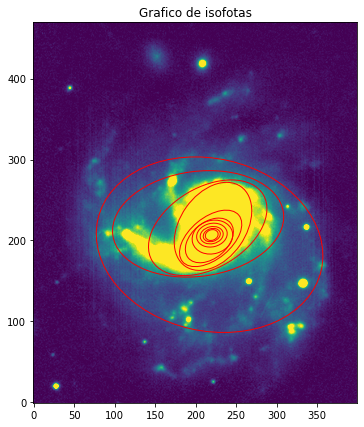

In [507]:
Isofota_Imagen_1 = Isofotas(Objeto1,Elipse)
plt.figure(figsize=(7,7))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas')

for i in range(30,62,3):
    Aperturas(Isofota_Imagen_1,i).plot(color='red')



In [424]:
Objeto2 = Imagen_Filtro_g[560:590,755:790]

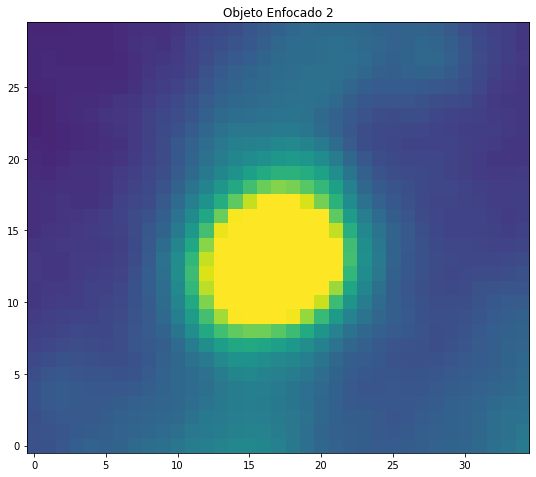

In [425]:
plt.figure(figsize=(9,9))
plt.imshow(Objeto2, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 2')
plt.show()

(<matplotlib.patches.Ellipse at 0x1629b2ec670>,)

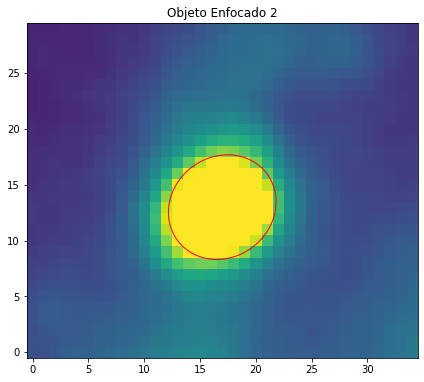

In [427]:
Elipse2 = EllipseGeometry(x0=17, y0=13, sma=5, eps=0.1,
                           pa=37.0 * np.pi / 180.0)

aper2 = EllipticalAperture((Elipse2.x0, Elipse2.y0), Elipse2.sma,
                          Elipse2.sma * (1 - Elipse2.eps),
                          Elipse2.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto2, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 2')

aper2.plot(color="red")

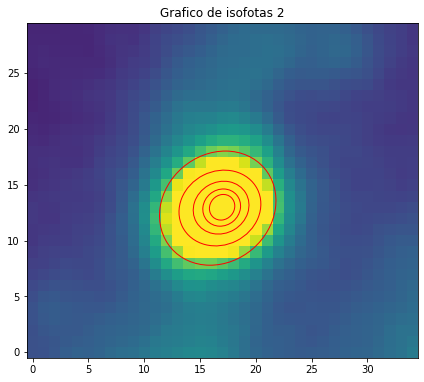

In [478]:
Isofota_imagen_2 = Isofotas(Objeto2,Elipse2)
plt.figure(figsize=(7,7))
plt.imshow(Objeto2, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Grafico de isofotas 2')

for i in range(10,30,4):
    Aperturas(Isofota_imagen_2,i).plot(color='red')


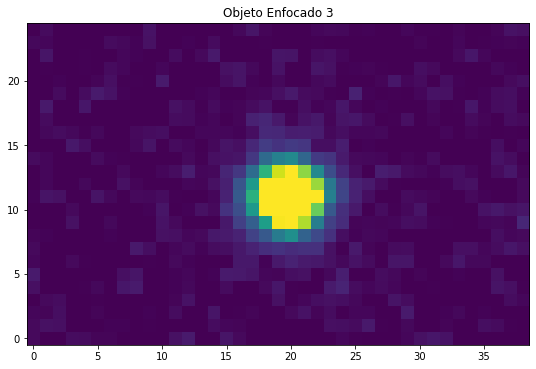

In [428]:
# Objeto filtro z
Objeto3 = Imagen_Filtro_z[205:230,250:289]
plt.figure(figsize=(9,9))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 3')
plt.show()

(<matplotlib.patches.Ellipse at 0x1629784f850>,)

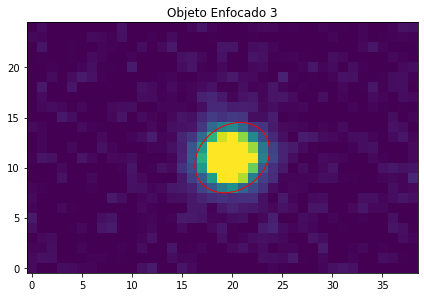

In [365]:
Elipse3 = EllipseGeometry(x0=20, y0=11, sma=4, eps=0.2,
                           pa=37.0 * np.pi / 180.0)

aper3 = EllipticalAperture((Elipse3.x0, Elipse3.y0), Elipse3.sma,
                          Elipse3.sma * (1 - Elipse3.eps),
                          Elipse3.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 3')

aper3.plot(color="red")

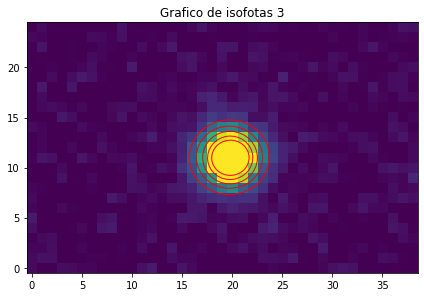

In [323]:
Isofota_imagen_3 = Isofotas(Objeto3,Elipse3)
plt.figure(figsize=(7,7))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 3')

for i in range(14,23,2):
    Aperturas(Isofota_imagen_3,i).plot(color='red')


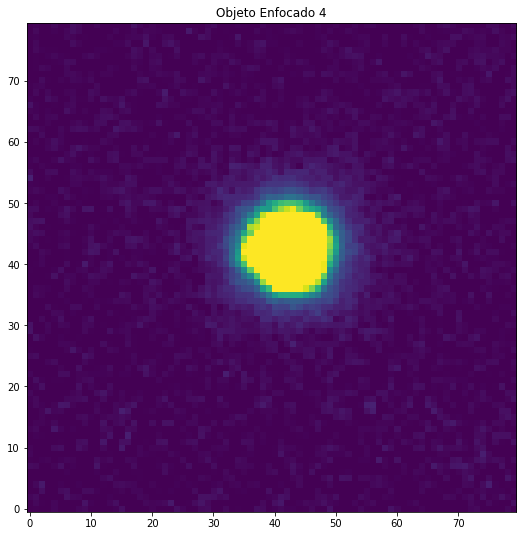

In [344]:
# Objeto 4 filtro z
Objeto4 = Imagen_Filtro_z[300:380,250:330]
plt.figure(figsize=(9,9))
plt.imshow(Objeto4, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 4')
plt.show()

(<matplotlib.patches.Ellipse at 0x16297f9e370>,)

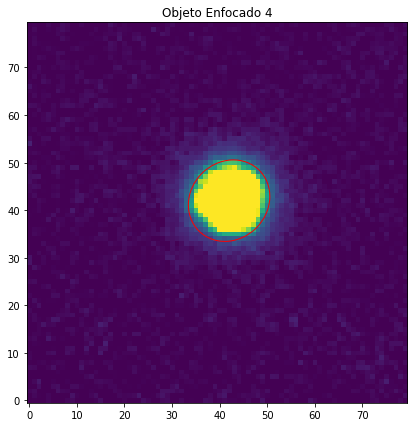

In [363]:
# Un ejemplo de prueba
Elipse4 = EllipseGeometry(x0=42, y0=42, sma=9, eps=0.1,
                           pa=45.0 * np.pi / 180.0)

aper4 = EllipticalAperture((Elipse4.x0, Elipse4.y0), Elipse4.sma,
                          Elipse4.sma * (1 - Elipse4.eps),
                          Elipse4.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto4, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 4')

aper4.plot(color="red")

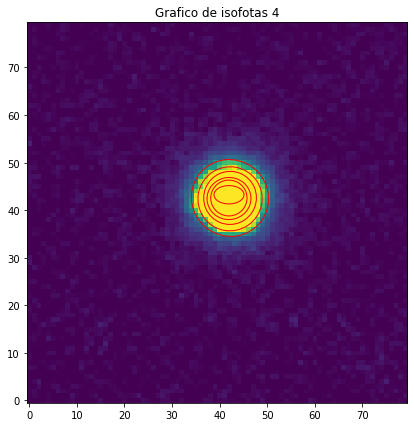

In [605]:
# Generamos la isofota para el cuarto objeto
Isofota_imagen_4 = Isofotas(Objeto4,Elipse4)
plt.figure(figsize=(7,7))
plt.imshow(Objeto4, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 4')

for i in range(20,32,2):
    Aperturas(Isofota_imagen_4,i).plot(color='red')

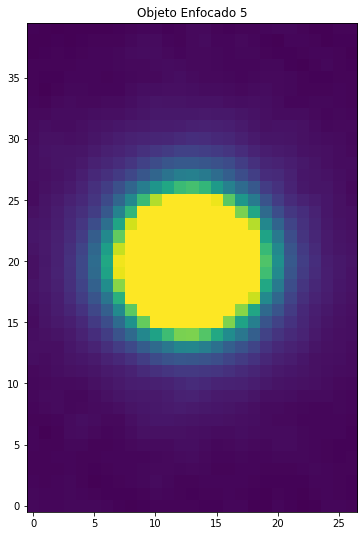

In [606]:
# Objeto 5 filtro g

Objeto5 = Imagen_Filtro_g[790:830,700:727]
plt.figure(figsize=(9,9))
plt.imshow(Objeto5, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 5')
plt.show() 

(<matplotlib.patches.Ellipse at 0x1629bb77160>,)

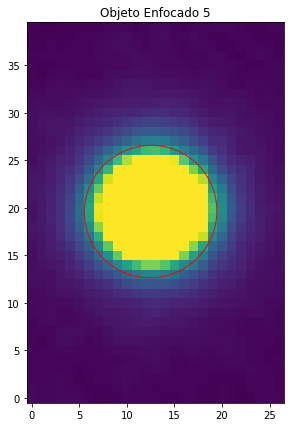

In [607]:
# Un ejemplo de prueba
Elipse5 = EllipseGeometry(x0=12.5, y0=19.6, sma=7, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper5 = EllipticalAperture((Elipse5.x0, Elipse5.y0), Elipse5.sma,
                          Elipse5.sma * (1 - Elipse5.eps),
                          Elipse5.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto5, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 5')

aper5.plot(color="red")

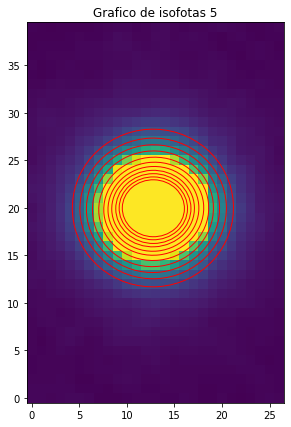

In [608]:
# Generamos la isofota para el quinto objeto
Isofota_imagen_5 = Isofotas(Objeto5,Elipse5)
plt.figure(figsize=(7,7))
plt.imshow(Objeto5, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 5')

for i in range(20,31,1):
    Aperturas(Isofota_imagen_5,i).plot(color='red')

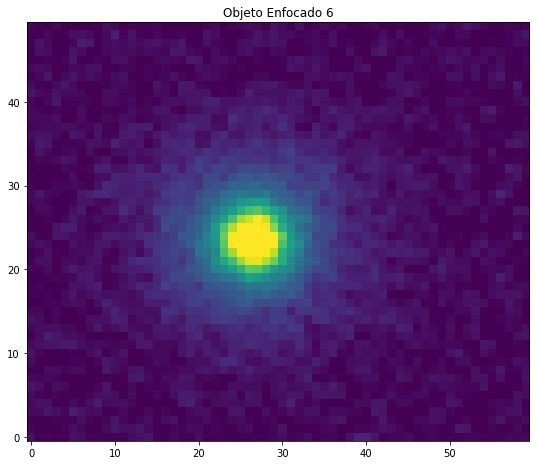

In [492]:
# Objeto 6 
Objeto6 = Imagen_Filtro_z[370:420,560:620]
plt.figure(figsize=(9,9))
plt.imshow(Objeto6, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 6')
plt.show() 

(<matplotlib.patches.Ellipse at 0x162a049f4f0>,)

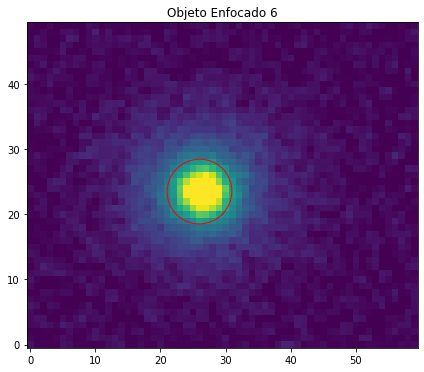

In [506]:
Elipse6 = EllipseGeometry(x0=26, y0=23.5, sma=5, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper6 = EllipticalAperture((Elipse6.x0, Elipse6.y0), Elipse6.sma,
                          Elipse6.sma * (1 - Elipse6.eps),
                          Elipse6.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto6, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 6')

aper6.plot(color="red")

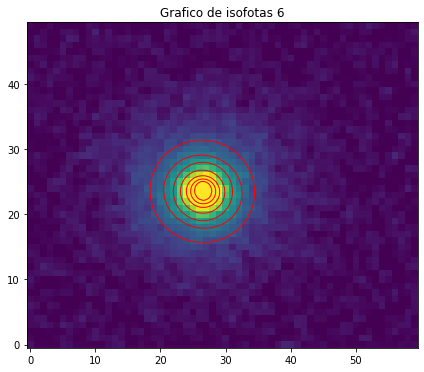

In [603]:
# Generamos la isofota para el sexto objeto
Isofota_imagen_6 = Isofotas(Objeto6,Elipse6)
plt.figure(figsize=(7,7))
plt.imshow(Objeto6, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 6')

for i in range(12,31,3):
    Aperturas(Isofota_imagen_6,i).plot(color='red')

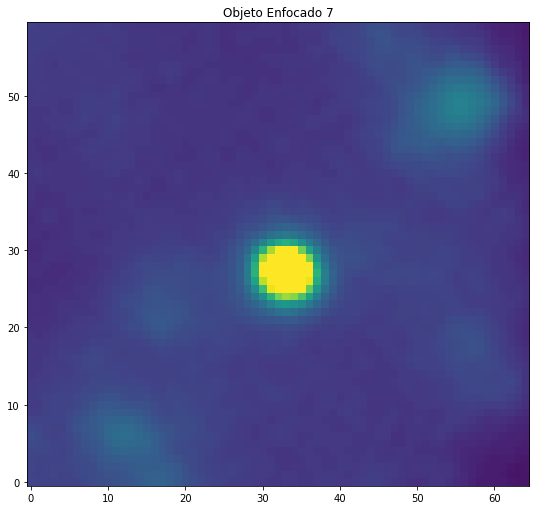

In [520]:
# Objeto 7 
Objeto7 = Imagen_Filtro_r[420:480,900:965]
plt.figure(figsize=(9,9))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_r)+np.std(Imagen_Filtro_r))
plt.title('Objeto Enfocado 7')
plt.show() 

(<matplotlib.patches.Ellipse at 0x16297cdb880>,)

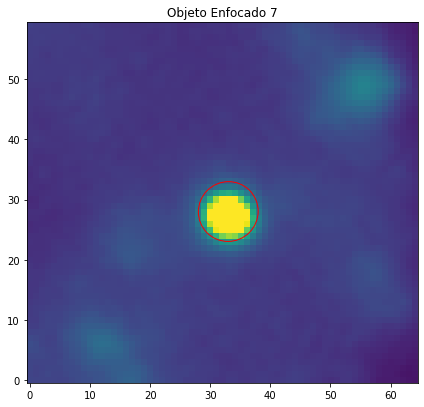

In [525]:
Elipse7 = EllipseGeometry(x0=33, y0=28, sma=5, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper7 = EllipticalAperture((Elipse7.x0, Elipse7.y0), Elipse7.sma,
                          Elipse7.sma * (1 - Elipse7.eps),
                          Elipse7.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_r)+np.std(Imagen_Filtro_r))
plt.title('Objeto Enfocado 7')

aper7.plot(color="red")

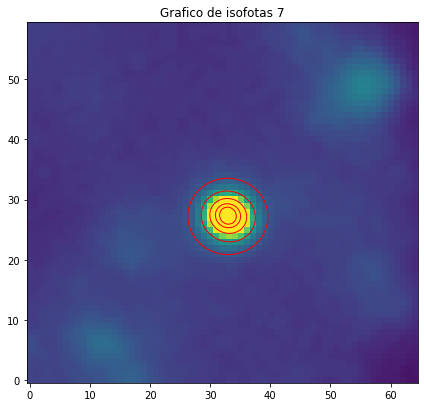

In [602]:
# Generamos la isofota para el septimo objeto
Isofota_imagen_7 = Isofotas(Objeto7,Elipse7)
plt.figure(figsize=(7,7))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_r)+np.std(Imagen_Filtro_r))
plt.title('Grafico de isofotas 7')

for i in range(12,31,4):
    Aperturas(Isofota_imagen_7,i).plot(color='red')

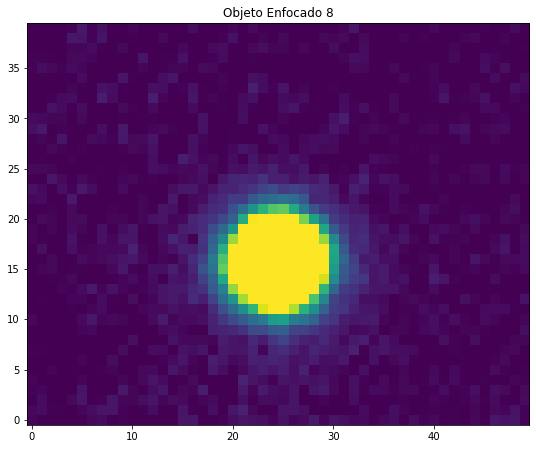

In [596]:
# Objeto 8
Objeto8 = Imagen_Filtro_z[860:900,600:650]
plt.figure(figsize=(9,9))
plt.imshow(Objeto8, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 8')
plt.show() 

(<matplotlib.patches.Ellipse at 0x162a16f06a0>,)

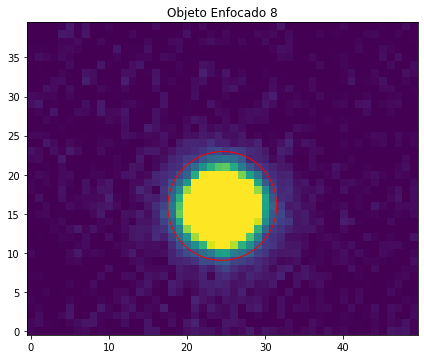

In [597]:
Elipse8 = EllipseGeometry(x0=24.5, y0=16, sma=7, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper8 = EllipticalAperture((Elipse8.x0, Elipse8.y0), Elipse8.sma,
                          Elipse8.sma * (1 - Elipse8.eps),
                          Elipse8.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto8, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 8')

aper8.plot(color="red")

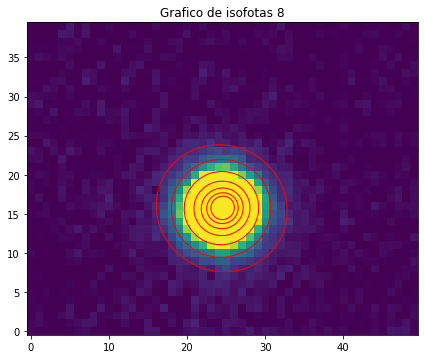

In [598]:
# Generamos la isofota para el octavo objeto
Isofota_imagen_8 = Isofotas(Objeto8,Elipse8)
plt.figure(figsize=(7,7))
plt.imshow(Objeto8, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 8')

for i in range(12,31,3):
    Aperturas(Isofota_imagen_8,i).plot(color='red')

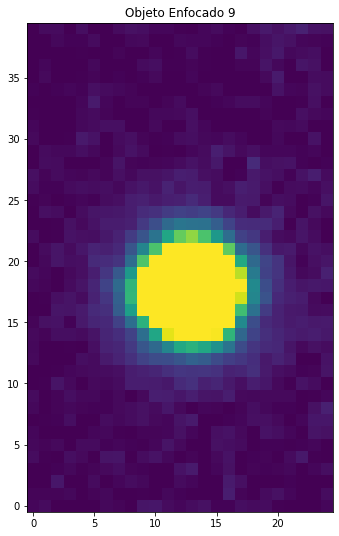

In [599]:
# Objeto 9 
Objeto9 = Imagen_Filtro_z[520:560,375:400]
plt.figure(figsize=(9,9))
plt.imshow(Objeto9, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 9')
plt.show() 


(<matplotlib.patches.Ellipse at 0x1629b316f10>,)

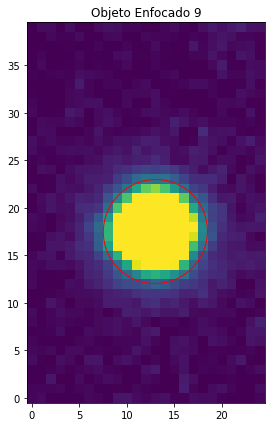

In [600]:
Elipse9 = EllipseGeometry(x0=13, y0=17.5, sma=5.5, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper9 = EllipticalAperture((Elipse9.x0, Elipse9.y0), Elipse9.sma,
                          Elipse9.sma * (1 - Elipse9.eps),
                          Elipse9.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto9, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 9')

aper9.plot(color="red")

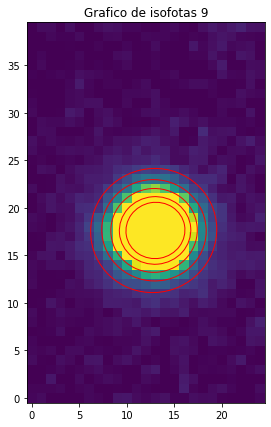

In [601]:
# Generamos la isofota para el noveno objeto
Isofota_imagen_9 = Isofotas(Objeto9,Elipse9)
plt.figure(figsize=(7,7))
plt.imshow(Objeto9, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 9')

for i in range(20,29,2):
    Aperturas(Isofota_imagen_9,i).plot(color='red')